<a href="https://colab.research.google.com/github/Aadhi7310/McD/blob/main/Fastfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the required libraries and dataset

In [4]:
fast_data = pd.read_csv('mcdonalds.csv')
fast_data.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


The first 5 data of the consumers are visible in the above table

In [5]:
fast_data.shape

(1453, 15)

The dataset consist of 1453 user response to 15 queries

In [6]:
fast_ratings = fast_data.iloc[:,0:11]
fast_ratings.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


Seperated the reaction of users from the overall dataset

In [7]:
fast_ratings = (fast_ratings == "Yes").astype(int)
fast_ratings.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


Converted YES to 1 and NO to 0

In [8]:
col_means = np.round(np.mean(fast_ratings, axis=0), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [9]:
import sklearn
from sklearn.decomposition import PCA

In [13]:
pca = PCA()
fast_pca = pca.fit_transform(fast_ratings)
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)
summary = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': var,
    'Cumulative Proportion': cum_var
})
print(summary.round(4))

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


Found the standard deviation,variance and cumulative proportion of the dataset

In [14]:
rot = pca.components_
print(rot)

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

In [16]:
rotation = pd.DataFrame(rot, columns=fast_ratings.columns)
print(rotation)

       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.589622 -0.138241 -0.627799  0.140060   
8   0.572403   -0.018465  0.400280  -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284   -0.665818 -0.075634  -0.005338  0.008707  0.239532  0.428087   
10  0.045439   -0.541616  0.141730   0.250910  0.001642  0.339265 -0.489283   

       tasty  expensive   healthy  disgusting  
0  

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
fast_scaled = scaler.fit_transform(fast_ratings)
scores = pca.transform(fast_scaled)
print(scores)

[[ 1.44543356 -0.55222853  2.51789046 ...  0.42095792  1.10358587
  -0.83431238]
 [ 0.11111057  0.69346532 -0.30142477 ...  0.23158247  1.06461667
  -0.6987977 ]
 [ 1.20102724  1.46408373  0.96952008 ... -0.16545829  0.05787655
   1.08947724]
 ...
 [ 0.18929348  2.06713266  1.61020173 ...  0.08208949  0.17379586
   0.2961456 ]
 [-2.06288463 -0.14064767  2.6856336  ...  0.10557905  0.01951966
  -0.02424433]
 [ 3.97890741  0.53025434  1.22465225 ... -0.4634496  -1.22678649
  -1.05952615]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


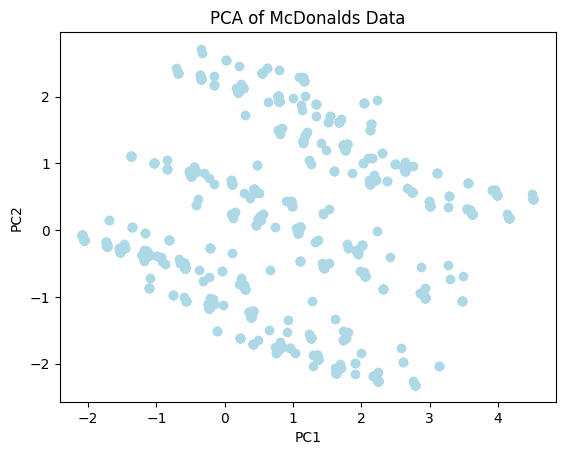

In [23]:
plt.scatter(scores[:, 0], scores[:, 1], color='lightblue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Data')
plt.show()